
**Jupyter Notebook Example: Linear Regression for Predicting House Prices**

**1. Introduction to Linear Regression**

*   **Concept:** Linear regression is a simple yet powerful machine learning algorithm used to predict a continuous target variable based on one or more input features. It assumes a linear relationship between the features and the target.

*   **Analogy:** Imagine you want to predict the price of a house. Intuitively, you know that larger houses usually cost more. Linear regression tries to find the best-fitting straight line that represents this relationship between house size (feature) and house price (target).

*   **Formula:**  In its simplest form (single feature), linear regression can be represented as:

    ```
    y = mx + c
    ```

    Where:
    *   `y` is the predicted target variable (e.g., house price).
    *   `x` is the input feature (e.g., house size).
    *   `m` is the slope (coefficient) – it tells us how much `y` changes for a unit change in `x`.
    *   `c` is the y-intercept (constant) – the value of `y` when `x` is zero.

*   **Goal:** The goal of linear regression is to find the optimal values for `m` and `c` that minimize the difference between the predicted `y` values and the actual `y` values in our dataset.

**2. Use Case: Predicting House Prices Based on Size**

*   **Scenario:** Let's say you're a real estate agent, and you want to build a simple model to predict house prices based on their size (square footage). You have collected some historical data of house sizes and their corresponding prices in your area.

*   **Dataset (Example - we'll generate a synthetic one for this example):**

    | Size (sq ft) | Price ($) |
    |--------------|-----------|
    | 800          | 150,000   |
    | 1200         | 220,000   |
    | 1500         | 280,000   |
    | 2000         | 350,000   |
    | 2500         | 450,000   |
    | ...          | ...       |


**3. Python Code in Jupyter Notebook**

Let's start writing the Python code in a Jupyter Notebook step-by-step.

**Step 1: Import Libraries**

We'll need the following libraries:

*   **`pandas`**: For data manipulation and creating dataframes.
*   **`numpy`**: For numerical operations, especially for creating arrays.
*   **`matplotlib.pyplot`**: For plotting and visualizing our data and model.
*   **`sklearn.linear_model`**:  From scikit-learn (a popular machine learning library), we'll use the `LinearRegression` model.
*   **`sklearn.model_selection`**: To split our data into training and testing sets.
*   **`sklearn.metrics`**: For evaluating our model's performance (e.g., Mean Squared Error).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


**Step 2: Create or Load Data**

For this example, let's create some synthetic data that resembles house sizes and prices. In a real-world scenario, you would load your data from a CSV file, database, etc.


In [2]:
# Generate synthetic data
np.random.seed(0) # for reproducibility
house_sizes = np.array([800, 1200, 1500, 2000, 2500, 900, 1300, 1600, 2200, 2600, 1000, 1400, 1700, 2300, 2700]).reshape(-1, 1) # Reshape to be a 2D array (required by scikit-learn)
house_prices = np.array([150000, 220000, 280000, 350000, 450000, 170000, 240000, 300000, 380000, 480000, 190000, 260000, 320000, 400000, 500000]) + np.random.normal(0, 30000, 15) # Add some random noise for realism

# Create a Pandas DataFrame (optional but nice for visualization)
data = pd.DataFrame({'Size': house_sizes.flatten(), 'Price': house_prices}) # flatten() to make 1D array for DataFrame
print(data.head())

   Size          Price
0   800  202921.570379
1  1200  232004.716251
2  1500  309362.139523
3  2000  417226.795976
4  2500  506026.739704


**Explanation:**

*   `np.random.seed(0)`:  Ensures that the random numbers generated are the same every time you run the code, making the example reproducible.
*   `np.array([...]).reshape(-1, 1)`: Creates a NumPy array for house sizes. `.reshape(-1, 1)` is important because scikit-learn expects features to be in a 2D array format (even if you only have one feature).
*   `np.array([...]) + np.random.normal(0, 30000, 15)`: Creates house prices that generally increase with size, but adds some random noise using `np.random.normal`. This makes the data more realistic (real-world relationships are rarely perfectly linear).
*   `pd.DataFrame(...)`: Creates a Pandas DataFrame to easily visualize and work with the data.

**Step 3: Visualize the Data**

Let's plot our data to see if there's a linear relationship between house size and price.


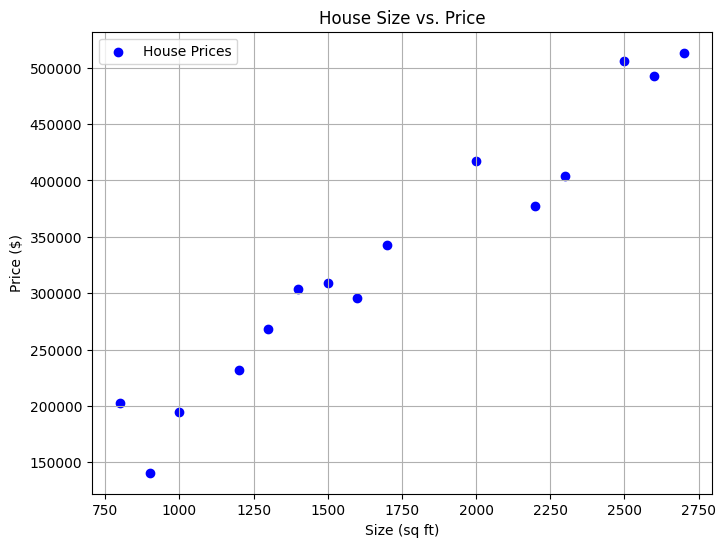

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Size'], data['Price'], color='blue', label='House Prices')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($)')
plt.title('House Size vs. Price')
plt.grid(True)
plt.legend()
plt.show()


**Explanation:**

*   `plt.scatter(...)`: Creates a scatter plot to visualize the data points. We plot 'Size' on the x-axis and 'Price' on the y-axis.
*   `plt.xlabel(...)`, `plt.ylabel(...)`, `plt.title(...)`, `plt.grid(True)`, `plt.legend()`:  Add labels, title, grid, and legend to make the plot more informative.
*   `plt.show()`: Displays the plot.

*Looking at the plot, you should see a general upward trend, suggesting a positive linear relationship between house size and price.*

**Step 4: Prepare Data for the Model (Feature and Target)**

We need to separate our data into features (input) and the target variable (output).


In [4]:
X = data[['Size']] # Features (input) - Size, needs to be DataFrame for sklearn in this case
y = data['Price']   # Target (output) - Price


**Explanation:**

*   `X = data[['Size']]`: We select the 'Size' column from our DataFrame as the feature (input). We use `[['Size']]` to keep it as a DataFrame, which is generally expected by scikit-learn for features.
*   `y = data['Price']`: We select the 'Price' column as the target variable (output).

**Step 5: Split Data into Training and Testing Sets**

To evaluate how well our model generalizes to new, unseen data, we split our data into two sets:

*   **Training set:** Used to train (fit) the linear regression model.
*   **Testing set:** Used to evaluate the performance of the trained model on data it hasn't seen during training.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training, 20% testing
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 12
Testing set size: 3



**Explanation:**

*   `train_test_split(X, y, test_size=0.2, random_state=42)`:
    *   `X, y`: The features and target variable we want to split.
    *   `test_size=0.2`:  Specifies that 20% of the data should be used for testing, and 80% for training.
    *   `random_state=42`:  Sets a seed for the random splitting process. This ensures that if you run the code again, you'll get the same train/test split. This is helpful for reproducibility.

**Step 6: Train the Linear Regression Model**

Now, we create a `LinearRegression` model and train it using our training data.


In [6]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Model trained!")

Model trained!



**Explanation:**

*   `model = LinearRegression()`: Creates an instance of the `LinearRegression` model.
*   `model.fit(X_train, y_train)`:  This is where the model *learns* from the training data. It finds the best-fitting line by determining the optimal slope (`m`) and y-intercept (`c`) that minimize the error on the training data.

**Step 7: Make Predictions on the Test Set**

Let's use our trained model to predict house prices for the houses in our test set (which the model hasn't seen before).


In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual vs. predicted prices
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(predictions_df)

     Actual Price  Predicted Price
9   492317.955058    496689.695418
11  303628.205209    268341.307123
0   202921.570379    154167.112975



**Explanation:**

*   `y_pred = model.predict(X_test)`:  Uses the trained `model` to predict prices for the `X_test` (test set features). The predicted prices are stored in `y_pred`.

**Step 8: Evaluate the Model**

We need to evaluate how well our model is performing. A common metric for linear regression is **Mean Squared Error (MSE)**. MSE measures the average squared difference between the actual and predicted values. Lower MSE indicates better model performance.


In [8]:
# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) on Test Set: {mse:.2f}") #:.2f formats to 2 decimal places

Mean Squared Error (MSE) on Test Set: 1213758135.70



**Explanation:**

*   `mse = mean_squared_error(y_test, y_pred)`: Calculates the Mean Squared Error between the actual test set prices (`y_test`) and the predicted prices (`y_pred`).
*   `print(f"Mean Squared Error (MSE) on Test Set: {mse:.2f}")`: Prints the MSE value, formatted to two decimal places for readability.

**Step 9: Visualize the Regression Line**

Let's plot the regression line that our model has learned, along with the original data points. This will help us visualize how well the line fits the data.


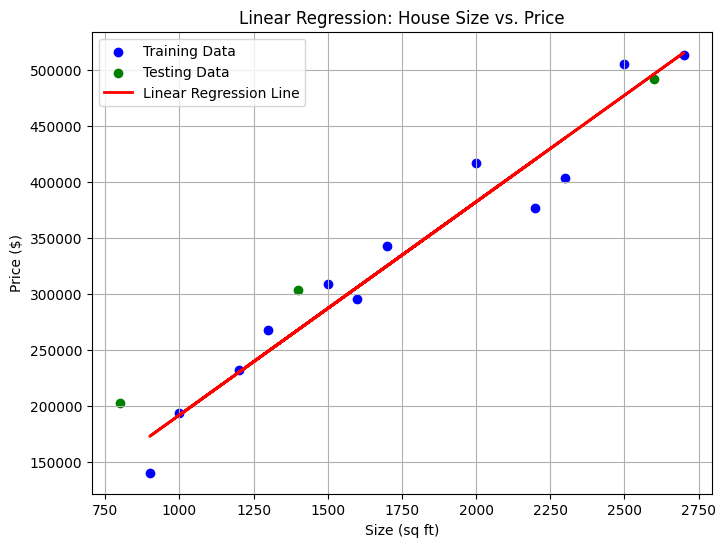

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data') # Plot training data
plt.scatter(X_test, y_test, color='green', label='Testing Data')   # Plot testing data
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Linear Regression Line') # Plot regression line
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($)')
plt.title('Linear Regression: House Size vs. Price')
plt.grid(True)
plt.legend()
plt.show()


**Explanation:**

*   `plt.scatter(X_train, y_train, color='blue', label='Training Data')`: Plots the training data points in blue.
*   `plt.scatter(X_test, y_test, color='green', label='Testing Data')`: Plots the testing data points in green.
*   `plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Linear Regression Line')`:
    *   `model.predict(X_train)`:  Generates predictions for the training data using the trained model. These predictions will lie on the regression line.
    *   `plt.plot(...)`: Plots the regression line in red.

**Step 10: Make Predictions for New Data**

Let's say you have a new house with a size of 1800 sq ft and you want to predict its price using your trained model.


In [ ]:
# new_house_size = np.array([[1800]]) # Needs to be a 2D array
new_house_size = pd.DataFrame([[1800]], columns=['Size']) 
predicted_price = model.predict(new_house_size)
print(f"Predicted price for a house of 1800 sq ft: ${predicted_price[0]:,.2f}") # :,.2f formats with commas and 2 decimal places

Predicted price for a house of 1800 sq ft: $344,457.44



**Explanation:**

*   `new_house_size = np.array([[1800]])`:  Creates a NumPy array for the new house size. **Important:** It must be reshaped into a 2D array `[[1800]]` because scikit-learn expects features to be in this format.
*   `predicted_price = model.predict(new_house_size)`: Uses the trained model to predict the price for the new house size.
*   `print(...)`: Prints the predicted price, formatted to include commas for thousands separators and two decimal places.